<a href="https://colab.research.google.com/github/Avina20/Fashion-MNIST/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 87.9MB 51kB/s 
     |████████████████████████████████| 3.1MB 41.1MB/s 
     |████████████████████████████████| 501kB 44.8MB/s 


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

2.0.0-beta1


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout
from tensorflow.keras.models import Model

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print('x_train.shape : ',x_train.shape)

x_train.shape :  (60000, 28, 28)


In [0]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print('x_train.shape : ',x_train.shape)

x_train.shape :  (60000, 28, 28, 1)


In [0]:
K = len(set(y_train))
print('Number of classes :',K)

Number of classes : 10


In [0]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 30s 505us/sample - loss: 0.5232 - accuracy: 0.8060 - val_loss: 0.3895 - val_accuracy: 0.8536
Epoch 2/15
60000/60000 [==============================] - 30s 500us/sample - loss: 0.3626 - accuracy: 0.8640 - val_loss: 0.3385 - val_accuracy: 0.8744
Epoch 3/15
60000/60000 [==============================] - 30s 500us/sample - loss: 0.3134 - accuracy: 0.8812 - val_loss: 0.3158 - val_accuracy: 0.8825
Epoch 4/15
60000/60000 [==============================] - 30s 502us/sample - loss: 0.2820 - accuracy: 0.8930 - val_loss: 0.3102 - val_accuracy: 0.8875
Epoch 5/15
60000/60000 [==============================] - 30s 504us/sample - loss: 0.2560 - accuracy: 0.9042 - val_loss: 0.3127 - val_accuracy: 0.8884
Epoch 6/15
60000/60000 [==============================] - 30s 498us/sample - loss: 0.2361 - accuracy:

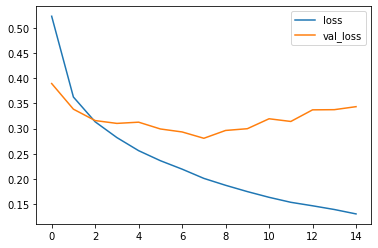

In [0]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

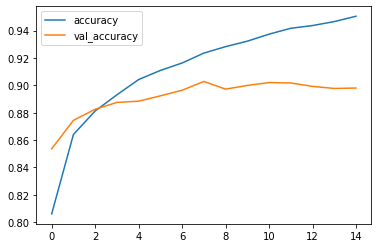

In [0]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[831   2  24  17   2   0 120   0   4   0]
 [  2 977   1  14   3   0   2   0   1   0]
 [ 11   0 839  10  77   0  60   0   3   0]
 [ 13   5  19 894  40   2  26   0   0   1]
 [  0   0  35  13 899   0  53   0   0   0]
 [  0   0   0   0   1 977   1  10   0  11]
 [ 92   0  75  20 125   0 683   0   5   0]
 [  0   0   0   0   0  23   0 949   0  28]
 [  3   0   7   0   5   3  12   4 966   0]
 [  1   0   0   0   0   8   0  26   0 965]]


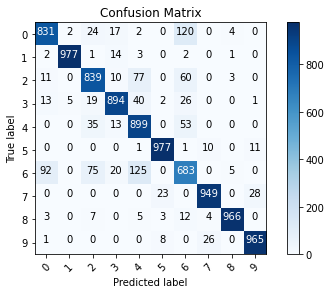

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))    
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize  else 'd'
  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j], fmt),
             horizontalalignment='center',
             color='white' if cm[i, j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [0]:
labels = '''T-shirt/Top,
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot'''.split()

Text(0.5, 1.0, 'True label: 2 Predicted label: 4')

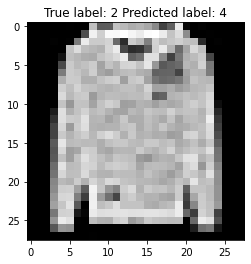

In [0]:
misclassified_ind = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_ind)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title('True label: %s Predicted label: %s' %(y_test[i], p_test[i]))